In [1]:
# Magics
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import logging

import elfi
import lfire
import graphviz

import numpy as np
import matplotlib.pyplot as plt

from lfire.models import arch

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


 /usr/local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
 /usr/local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


In [3]:
# Get logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [4]:
# Get the arch model
m = arch.get_model(noise=17)

INFO:lfire.models.arch:true_params were not given. Now using [t1, t2] = [0.3, 0.7].


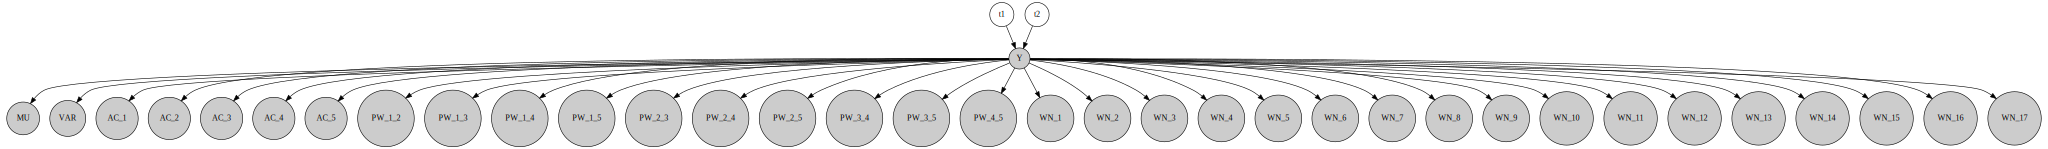

In [5]:
# Draw the model
elfi.draw(m)

In [6]:
# Create a grid for parameters
n = 25

t1 = np.linspace(-1, 1, n)
t2 = np.linspace(0, 1, n)

tt1, tt2 = np.meshgrid(t1, t2, indexing='ij')

params_grid = np.c_[tt1.flatten(), tt2.flatten()]

In [7]:
# LFIRE method
lfire_method = lfire.LFIRE(
    model=m,
    params_grid=params_grid,
    batch_size=500  # size of training data
)

INFO:lfire.methods.lfire:New marginal data (500 x 34) are generated.


In [8]:
# Run inference
%time lfire_res = lfire_method.infer()

Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 36min 5s, sys: 2min 36s, total: 38min 42s
Wall time: 12min 26s


In [9]:
# Get results
lfire_res.results

OrderedDict([('n_sim', 312500),
             ('n_batches', 625),
             ('posterior',
              array([1.26957395e-01, 3.62411201e-01, 1.79572752e-01, 3.60230506e-01,
                     1.38385840e-02, 1.73504107e-03, 2.67984054e-01, 2.67396759e-01,
                     6.47830321e-02, 1.13259636e-01, 2.92865175e-03, 3.03091611e-03,
                     3.98109824e-03, 1.27876648e-03, 5.04340174e-03, 1.23534386e-02,
                     8.92696833e-02, 5.46189817e-03, 4.28853229e-01, 4.28667934e-01,
                     7.03737391e-04, 3.65688089e-01, 2.37068946e-01, 2.35334845e-04,
                     2.85083181e-06, 1.16562971e-03, 4.62367448e-03, 7.47409756e-06,
                     5.67718391e-04, 3.80868659e-03, 2.86457877e-03, 1.26260417e-03,
                     7.69280810e-04, 1.62958588e-03, 9.05104890e-03, 7.86127152e-03,
                     5.39639986e-04, 3.22138985e-01, 2.11704034e-01, 3.23541367e-01,
                     4.66362549e-04, 3.47932571e-02, 2.219

In [10]:
# Print summary
lfire_res.summary()

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: 0.5, t2: 0.542
Posterior means: t1: 0.368, t2: 0.632



In [11]:
# Print summary
print(lfire_res)

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: 0.5, t2: 0.542
Posterior means: t1: 0.368, t2: 0.632



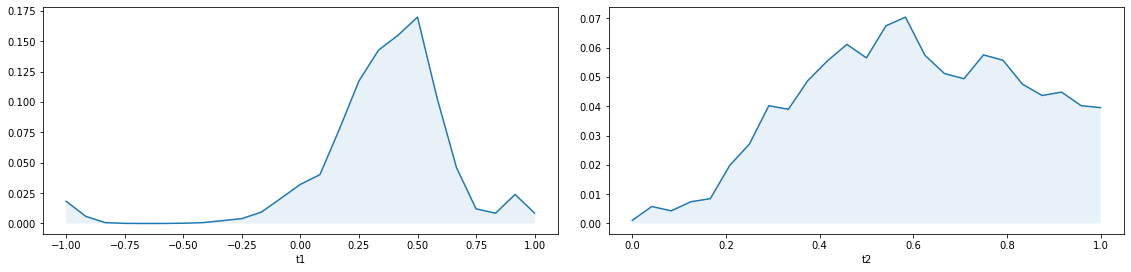

In [12]:
# Visualize marginals
lfire_res.plot_marginals();

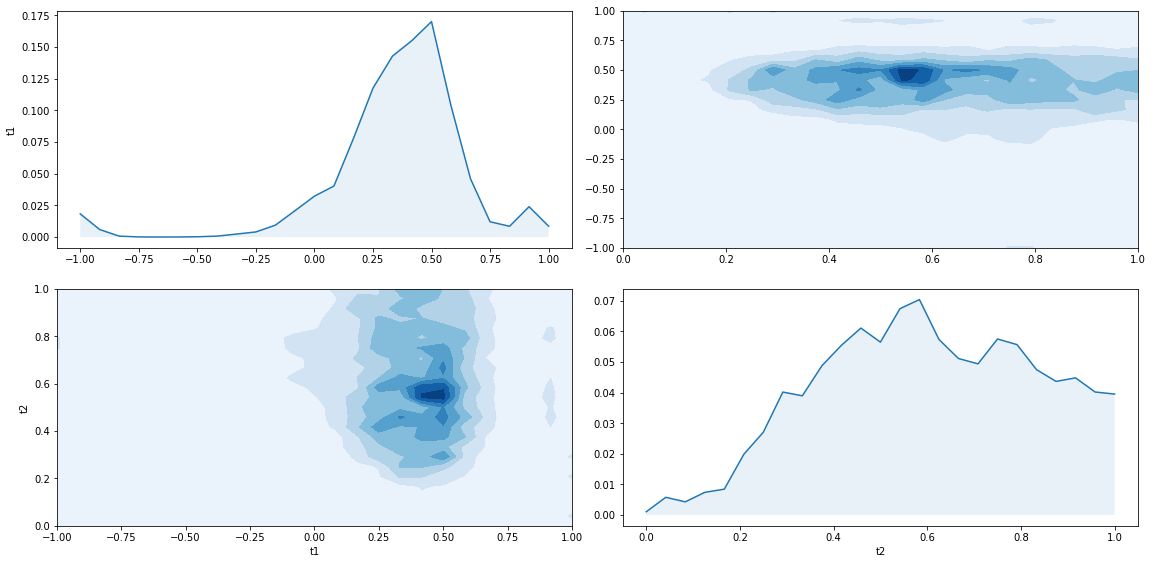

In [13]:
# Visualize pairs
lfire_res.plot_pairs();